<font size='5'>**Introduction**</font>

### Identifying the Most Important Features in Fraud Detection Using Random Forest

In this section of the project, we will identify and evaluate the most important features that contribute to predicting fraudulent transactions. Using a trained **Random Forest Classifier** model, we will extract the feature importance scores, which indicate the relative contribution of each feature to the model’s predictions.

### What will be covered:
1. **Feature Importance Calculation**: The importance of each feature in the fraud detection model will be determined.
2. **Top Features Display**: We will display the top 10 most important features based on their impact on the model.
3. **Visualization**: A bar chart will be presented to visually compare the importance of the top features.
4. **Insights for Future Work**: The feature importance analysis will help prioritize which features to focus on for further model optimization and possible feature selection.


<font size='5'>**Importing Dataset**</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

# Detect encoding
with open('Fraud.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [2]:
original_data = pd.read_csv('Fraud.csv', encoding='ascii')
df=original_data

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2216278,186,CASH_OUT,276199.76,C933903344,10101.00,0.00,C2037759052,0.00,276199.76,0,0
6042594,490,PAYMENT,320.17,C555726081,0.00,0.00,M1866590494,0.00,0.00,0,0
1398657,139,CASH_OUT,103137.26,C435710485,94579.51,0.00,C875038878,3734834.64,3837971.90,0,0
2271268,187,CASH_IN,303564.70,C842078629,3163408.00,3466972.71,C2135937442,387456.43,83891.72,0,0
6209605,588,CASH_IN,7660.71,C893359256,20881.00,28541.71,C1054332467,23404.59,15743.88,0,0


<font size='5'>**Pre-processing**</font>

1) The given dataset is highly imbalanced toward class 0. Therefore, it is important to select a model that can perform effectively on imbalanced data.

In [4]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

1) Calculated the percentage of actual fraud cases (isFraud = 1) where the predicted flag (isFlaggedFraud) is equal to 0.
2) This indicates that the dataset exhibits a Type II error, also known as a **False Negative**.

In [5]:
correctly_flagged_fraud = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]
count_correctly_flagged = correctly_flagged_fraud.shape[0]
print(count_correctly_flagged)
total_frauds = df[df['isFraud'] == 1].shape[0]
percentage_caught = (count_correctly_flagged / total_frauds) * 100
print(f"{percentage_caught:.2f}% of frauds were correctly flagged.")

8197
99.81% of frauds were correctly flagged.


1) Calculated the percentage of cases where the actual fraud label (isFraud = 0) but the predicted flag (isFlaggedFraud) is 1.
2) We observe that the dataset does not exhibit Type I errors, i.e., **False Positives**.

In [6]:
correctly_flagged_fraud = df[(df['isFraud'] == 0) & (df['isFlaggedFraud'] == 1)]
count_correctly_flagged = correctly_flagged_fraud.shape[0]
print(count_correctly_flagged)
total_frauds = df[df['isFraud'] == 1].shape[0]
percentage_caught = (count_correctly_flagged / total_frauds) * 100
print(f"{percentage_caught:.2f}% of frauds were correctly flagged.")

0
0.00% of frauds were correctly flagged.


1) We can see that the dataset does not contain any missing values.

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

1) Using the **corr()** function, we can identify multicollinearity among the features.
2) It shows that 'oldbalanceOrg' and 'newbalanceOrig' are **99.88%** correlated, and 'oldbalanceDest' and 'newbalanceDest' are **97.65%** correlated.
3) Therefore, we can remove one feature from each highly correlated pair in the final dataset used for prediction.

In [8]:
df_new=df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

In [9]:
df_new.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [10]:
df=df[['step','type','amount','oldbalanceOrg','oldbalanceDest','isFraud']]

1) Using a **boxplot**, we can easily identify outliers in each column.

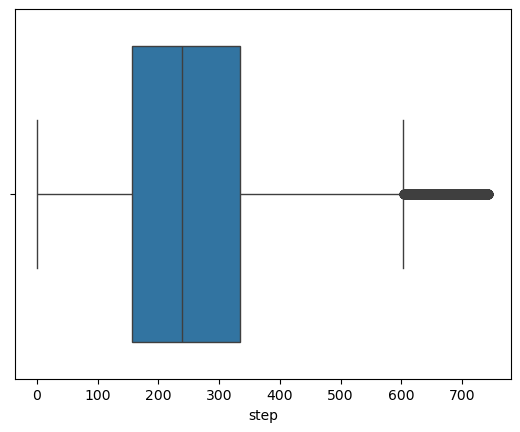

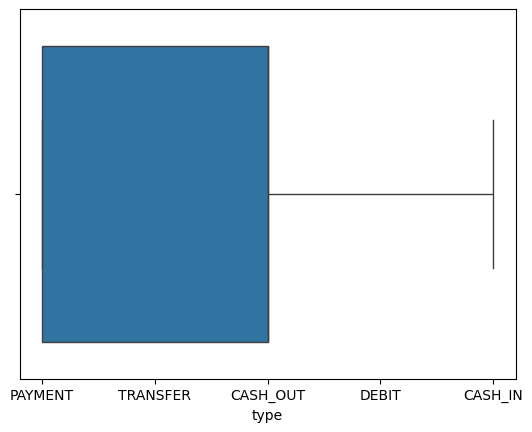

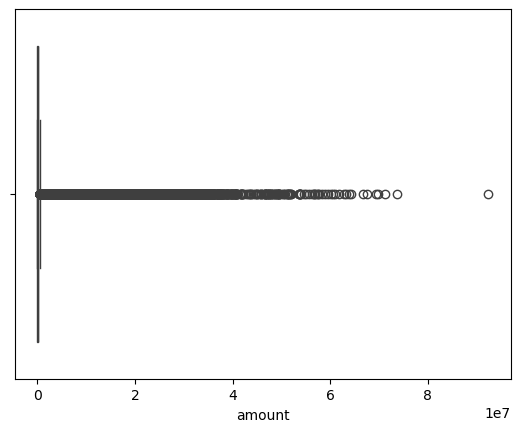

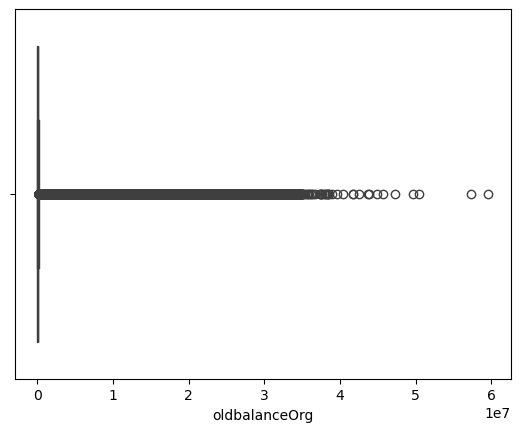

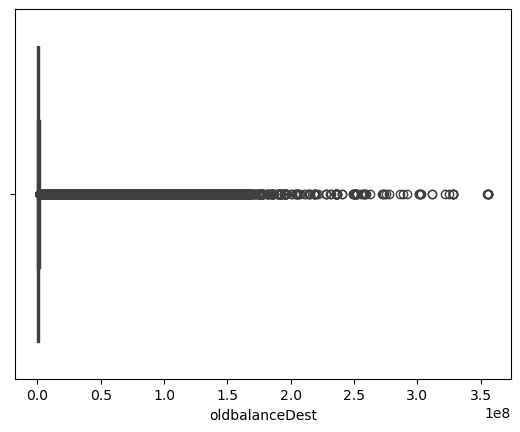

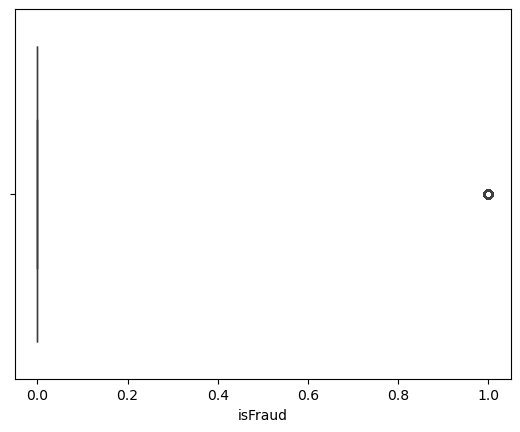

In [11]:
for col in df:
    sns.boxplot(x=df[col])
    plt.show()

1) Removal of outiler from dataset.

In [12]:
condition = (
    (df['step'] > 600) &
    (df['amount'] > 5000000) &
    (df['oldbalanceOrg'] > 10000000) &
    (df['oldbalanceDest'] >10000000)
)
df= df[~condition]
df.shape

(6362620, 6)

<font size='5'>**Feature Engineering**</font>

1) Using **OneHotEncoder**, we can encode the 'type' column.
2) To avoid **multicollinearity** among the encoded features, we need to drop one of the encoded columns.

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop=None)

encoded_type = ohe.fit_transform(df[['type']])

encoded_df = pd.DataFrame(encoded_type, columns=ohe.get_feature_names_out(['type']))

df = pd.concat([df.drop('type', axis=1), encoded_df], axis=1)


In [14]:
df.sample(5)

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1223545,133,17210.32,62591.0,0.00,0,0.0,0.0,0.0,1.0,0.0
3348303,253,151749.83,0.0,3427462.46,0,0.0,1.0,0.0,0.0,0.0
1762093,161,20802.35,0.0,0.00,0,0.0,0.0,0.0,1.0,0.0
3580584,261,104189.85,223407.0,0.00,0,0.0,1.0,0.0,0.0,0.0
5743114,399,753431.06,9910.0,0.00,0,0.0,1.0,0.0,0.0,0.0


1) Scaling of the column which have very wide range of values.

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_columns = scaler.fit_transform(df[['step', 'amount','oldbalanceOrg','oldbalanceDest']])

scaled_df = pd.DataFrame(scaled_columns, columns=['step','amount','oldbalanceOrg', 'oldbalanceDest'])

df[['step','amount','oldbalanceOrg', 'oldbalanceDest']] = scaled_df
    

In [16]:
df.sample(5)

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2140796,-0.307263,0.257443,0.845426,2.799122,0,1.0,0.0,0.0,0.0,0.0
5801212,0.905028,-0.267255,0.063309,-0.140722,0,0.0,0.0,0.0,1.0,0.0
4631301,0.502793,0.392841,-0.132395,0.036340,0,0.0,1.0,0.0,0.0,0.0
6222969,1.960894,-0.293637,0.056311,-0.140722,0,0.0,0.0,0.0,1.0,0.0
2204410,-0.296089,0.559156,0.065489,0.138324,0,1.0,0.0,0.0,0.0,0.0


<font size='5'>**Train Test Split**</font>

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['isFraud'])
y=df['isFraud']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=100)

1) Performed hyperparameter tuning of the model using Optuna.
2) Used a Random Forest model, as it works well on imbalanced datasets.
3) Finally, evaluated the model by calculating the **ROC-AUC** score.
4) The **ROC-AUC** score achieved is **0.9977**, indicating excellent model performance.

<font size='5'>**Hyper-Tunning and Model Fitting**</font>

In [18]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 50),  # small number of trees for speed
        'max_depth': trial.suggest_int('max_depth', 5, 15),         # limit depth for faster training
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'class_weight': 'balanced',
        'n_jobs': -1,  # use all cores
    }

    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)

    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=10)  

# Best parameters
print("Best hyperparameters:", study.best_params)

[I 2025-04-26 20:45:06,574] A new study created in memory with name: no-name-7fcc947d-4347-4f19-96dd-095ef5ae5750
[I 2025-04-26 20:45:45,421] Trial 0 finished with value: 0.9928828314548607 and parameters: {'n_estimators': 41, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9928828314548607.
[I 2025-04-26 20:46:23,393] Trial 1 finished with value: 0.9973634409424446 and parameters: {'n_estimators': 27, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9973634409424446.
[I 2025-04-26 20:46:37,592] Trial 2 finished with value: 0.9950702762449077 and parameters: {'n_estimators': 10, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9973634409424446.
[I 2025-04-26 20:47:23,689] Trial 3 finished with value: 0.9970840558549134 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_sam

Best hyperparameters: {'n_estimators': 38, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [21]:
# Train final model with best params
final_model = RandomForestClassifier(
    **study.best_params,
    n_jobs=-1,
    class_weight='balanced'
)

final_model.fit(X_train, y_train)

# Predictions and Evaluation
final_preds = final_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, final_preds)

print(f"Final ROC-AUC score: {final_auc:.4f}")


Final ROC-AUC score: 0.9977


          Feature  Importance
2   oldbalanceOrg    0.262509
1          amount    0.213370
8   type_TRANSFER    0.100074
0            step    0.089300
7    type_PAYMENT    0.088899
4    type_CASH_IN    0.086624
3  oldbalanceDest    0.079323
5   type_CASH_OUT    0.078947
6      type_DEBIT    0.000955


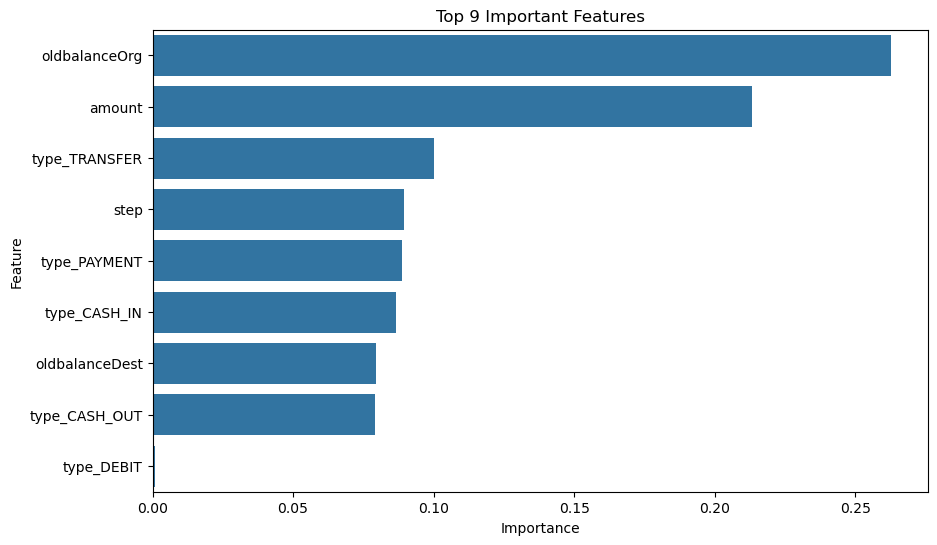

In [24]:
feature_importance = final_model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 9 Important Features')
plt.show()

<font size='5'>**Summary and Question Answer**</font>

### 1. Data Cleaning (Missing Values, Outliers, and Multicollinearity)
- **Missing Values**: No missing values found (df.isnull().sum()).
- **Outliers**: Detected using boxplots and removed extreme values.
- **Multicollinearity**: 
  - 'oldbalanceOrg' and 'newbalanceOrig' are **99.88% correlated**.
  - 'oldbalanceDest' and 'newbalanceDest' are **97.65% correlated**.
  - Dropped 'newbalanceOrig' and 'newbalanceDest' to reduce multicollinearity.

### 2. Fraud Detection Model Description
- **Encoding**: One-hot encoded the 'type' column, dropping one encoded column to avoid multicollinearity.
- **Scaling**: Used **RobustScaler** for scaling numerical features: 'step', 'amount', 'oldbalanceOrg', 'oldbalanceDest'.
- **Model**: Chose **Random Forest** for its effectiveness with sparse datasets.
- **Hyperparameter Tuning**: Tuned hyperparameters using **Optuna**.
- **Evaluation**: Evaluated using **ROC-AUC** score.

### 3. Variable Selection
- Retained relevant features: 'step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'.
- Removed redundant and highly correlated features based on domain knowledge and correlation analysis.
- Also use feature importance graph to select it.

### 4. Model Performance
- After tuning, the **Random Forest model achieved an ROC-AUC score of 0.9977**, indicating excellent performance.

### 5. Key Predictors of Fraudulent Activity
- **Transaction Amount** (amount).
- **Transaction Type** (type - e.g., TRANSFER, CASH_OUT).
- **Account Balance** (oldbalanceOrg, oldbalanceDest).

### 6. Do These Factors Make Sense?
Yes, the factors align with real-world fraud patterns:
- Large amounts, specific transaction types, and sudden balance changes are often signs of fraud.

### 7. Prevention Measures for Infrastructure Updates
- **Real-Time Monitoring** for suspicious activity.
- **Limit Large Transfers** on new accounts.
- **Enhanced Authentication** (e.g., MFA for sensitive transactions).
- **Behavioral Analysis** for anomaly detection.

### 8. Measuring Effectiveness of Preventive Measures
- **Compare Metrics**: Monitor fraud rate reduction.
- **Model Evaluation**: Track improvements in ROC-AUC, Precision, Recall.
- **Financial Savings**: Measure losses prevented through fraud detection.
